In [41]:
import pandas as pd

sentiment_index_df = pd.read_excel('https://raw.githubusercontent.com/inga-maria01/master_thesis/main/index/sentiment_index_unweighted_v7.xlsx')
sentiment_index_df.set_index('date', inplace=True)
sentiment_index_df.head()

,sentiment_score,sentiment_slope
date,,
2015-01-01,17.132027,-1.195109
2015-01-02,14.827878,-0.130807
2015-01-03,18.088204,0.938619
2015-01-04,16.568480,1.079692
2015-01-05,18.532825,-1.688521


In [42]:
nasdaq_100_df = pd.read_csv('https://raw.githubusercontent.com/inga-maria01/master_thesis/main/data/Nasdaq100_price_data.csv')
nasdaq_100_df['Date'] = pd.to_datetime(nasdaq_100_df['Date'])
nasdaq_100_df.set_index('Date', inplace=True)
nasdaq_100_df = nasdaq_100_df[1:]
nasdaq_100_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,4258.600098,4276.709961,4206.459961,4230.240234,4230.240234,1435150000
2015-01-05,4206.549805,4210.959961,4151.850098,4160.959961,4160.959961,1794470000
2015-01-06,4174.779785,4176.259766,4090.330078,4110.830078,4110.830078,2167320000
2015-01-07,4139.850098,4169.970215,4126.390137,4160.000000,4160.000000,1957950000
2015-01-08,4195.490234,4247.930176,4192.629883,4240.549805,4240.549805,2105450000


### Plot sentiment index & Nasdaq-100

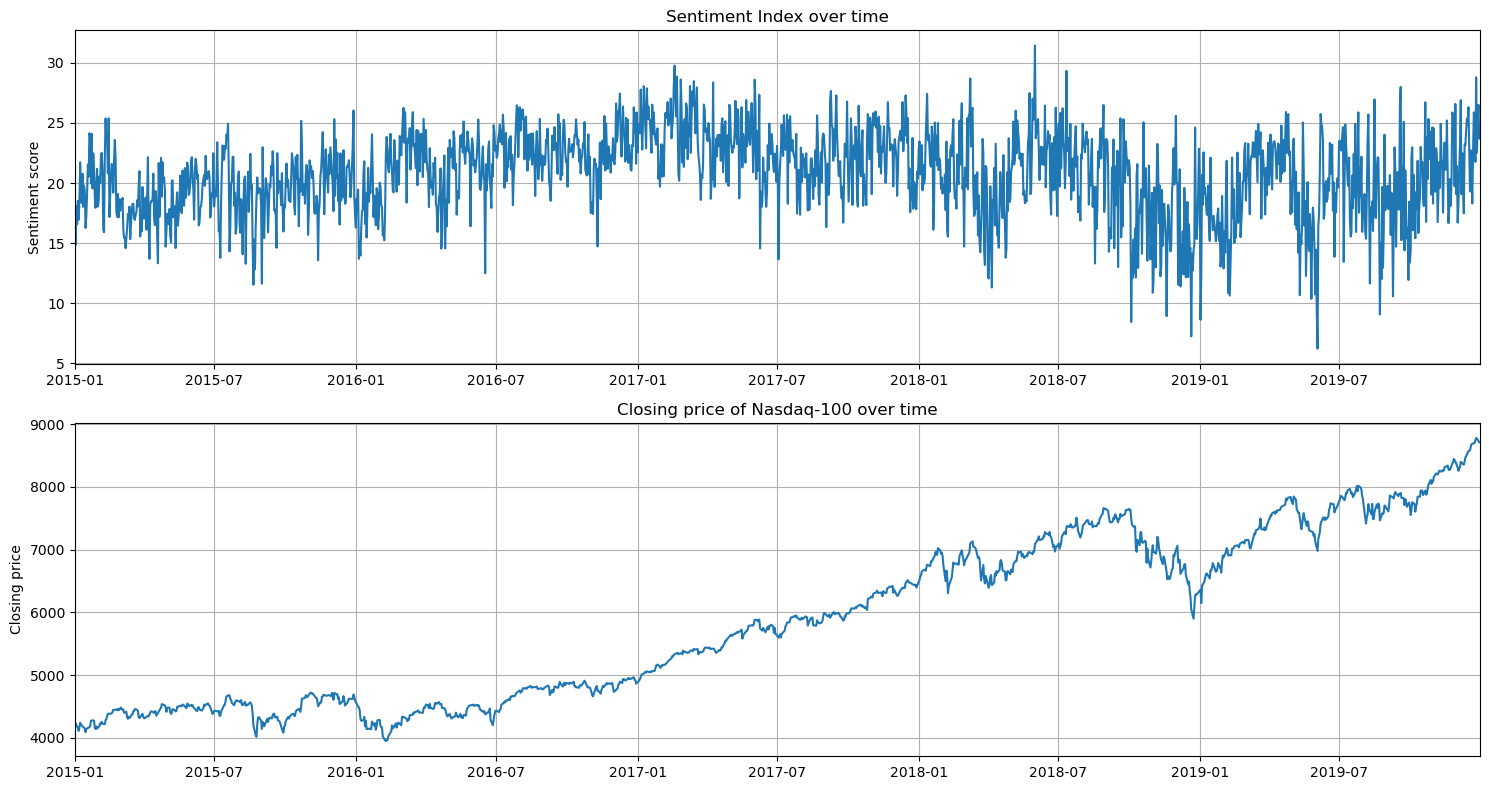

In [44]:
import matplotlib.pyplot as plt

# Assuming the data frames 'sentiment_index_df' and 'nasdaq_100_df' have a datetime index
start_date = sentiment_index_df.index.min()
end_date = sentiment_index_df.index.max()

plt.figure(figsize=(15, 8))

plt.subplot(2, 1, 1)
plt.plot(sentiment_index_df['sentiment_score'])
plt.ylabel('Sentiment score')
plt.title('Sentiment Index over time')
plt.grid(True)
plt.xlim([start_date, end_date])

plt.subplot(2, 1, 2)
plt.plot(nasdaq_100_df['Close'])
plt.ylabel('Closing price')
plt.title('Closing price of Nasdaq-100 over time')
plt.grid(True)
plt.xlim([start_date, end_date])

plt.tight_layout()  # Adjusts subplot params to give some padding
plt.show()


### Plot sentiment index & sentiment index with future 5-day MA
only plot working days

In [45]:
sentiment_idx_working_d = sentiment_index_df.copy()
sentiment_idx_working_d = sentiment_idx_working_d[~sentiment_idx_working_d.index.isin(sentiment_idx_working_d.index.difference(nasdaq_100_df.index))]
sentiment_idx_working_d.head()

,sentiment_score,sentiment_slope
date,,
2015-01-02,14.827878,-0.130807
2015-01-05,18.532825,-1.688521
2015-01-06,16.950898,-0.425215
2015-01-07,18.343075,-1.852799
2015-01-08,21.728897,0.104260


In [46]:
sentiment_idx_working_d['sentiment_ma_next_5'] = sentiment_idx_working_d['sentiment_score'].rolling(window=5).mean().shift(-4)
sentiment_idx_working_d.head()

,sentiment_score,sentiment_slope,sentiment_ma_next_5
date,,,
2015-01-02,14.827878,-0.130807,18.076714
2015-01-05,18.532825,-1.688521,18.956857
2015-01-06,16.950898,-0.425215,18.856387
2015-01-07,18.343075,-1.852799,19.425886
2015-01-08,21.728897,0.104260,19.629579


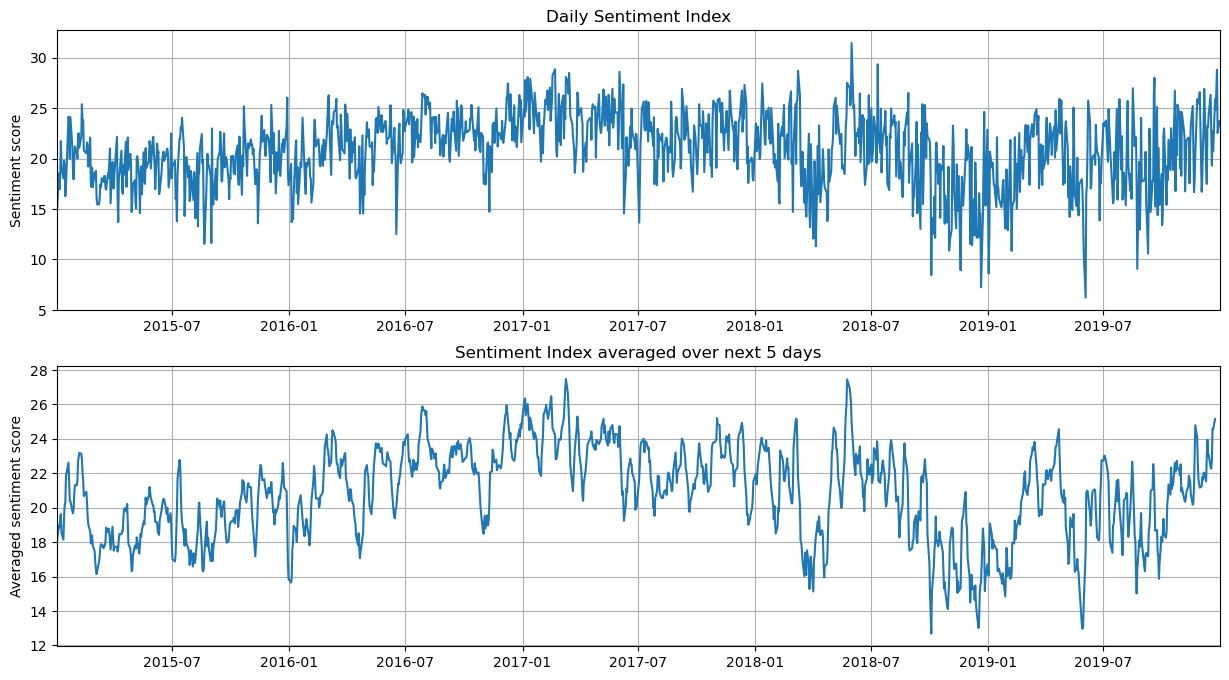

In [47]:
import matplotlib.pyplot as plt

start_date = sentiment_idx_working_d.index.min()
end_date = sentiment_idx_working_d.index.max()

plt.figure(figsize=(15,8))
plt.subplot(2, 1, 1)
plt.plot(sentiment_idx_working_d['sentiment_score'])
plt.ylabel('Sentiment score')
plt.xlim([start_date, end_date])
# plt.xlabel('time')
plt.title('Daily Sentiment Index')
plt.grid(True)
plt.subplot(2, 1, 2)
plt.plot(sentiment_idx_working_d['sentiment_ma_next_5'])
plt.ylabel('Averaged sentiment score')
plt.xlim([start_date, end_date])
plt.title('Sentiment Index averaged over next 5 days')
plt.grid(True)
plt.show()